In [1]:
import numpy as np
import matplotlib.pyplot as plt

from planner import *
from prob_cast import get_prob

np.random.seed(4)
prob = get_prob()

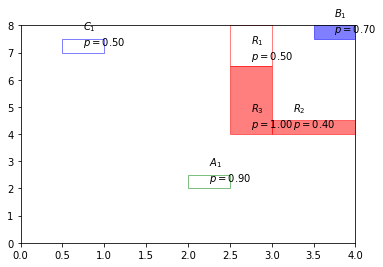

In [2]:
plot_problem(prob)

In [3]:
rob_pol = plan_mission(prob)

uav_pol = plan_exploration(prob, rob_pol)

finished after 1.88s and 30 iterations
finished after 0.02s and 6 iterations
16.214386293929884


success probability: 0.9726433753967285


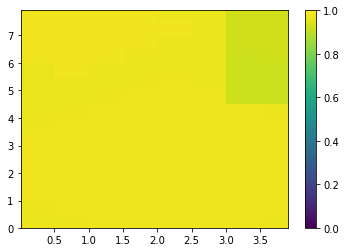

In [4]:
plot_value_rob(rob_pol, prob)

success value: 0.0


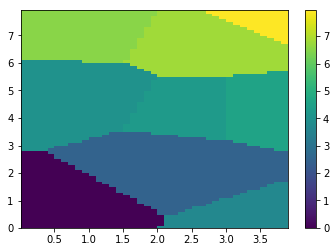

In [5]:
plot_value_uav(uav_pol, get_prob())

In [10]:
def uav_value(x, mapstate):  
    scop = uav_pol.abstraction.x_to_s(x)
    return uav_pol.val[(scop,) + tuple(mapstate)]

def my_uavval(x, y):
    return uav_value(np.array([x, y]), [0,2,0,1,2,0])

prob['env_x0']

[1, 1, 1, 1, 1, 0]

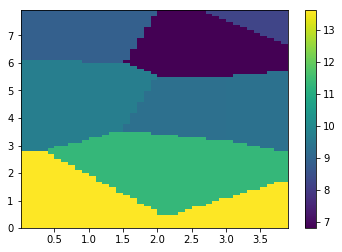

In [11]:
x_low = uav_pol.abstraction.x_low
x_up = uav_pol.abstraction.x_up

xx, yy = np.meshgrid(np.arange(x_low[0]+0.01, x_up[0]-0.01, 0.1), 
                     np.arange(x_low[1]+0.01, x_up[1]-0.01, 0.1))

vals = np.vectorize(my_uavval)(xx, yy)

plt.pcolor(xx, yy, vals)
plt.colorbar()